In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
all_samples = pd.read_csv('../summary_data/Figure3_data.csv')
all_samples.head()

,Body site,Tissue type,Histological type,Reads (millions),Number of samples,CD19+ B cells,Number of CDR3s (IGH),Number of CDR3s (IGK),Number of CDR3s (IGL),"CPM, IGH","CPM, IGK","CPM, IGL",Number of IGH-derived reads,Number of IGK-derived reads,Number of IGL-derived reads,"Diversity, IGH","Diversity, IGK","Diversity, IGL"
0,Spleen,Secondary lymphoid organs,Spleen,18,118,1.84,5390,7505,5437,301,420,304,726,2049,1130,7.7,7.6,7.4
1,Small Intestine - Terminal Ileum,Secondary lymphoid organs,Small Intestine,20,104,1.20,2017,3174,2125,101,159,106,196,564,271,6.5,6.8,6.5
2,Whole Blood,Blood associated sites,Blood,27,544,1.38,515,898,670,19,33,25,46,119,77,5.2,5.8,5.5
3,Artery - Coronary,Blood associated sites,Blood Vessel,19,140,0.52,112,171,118,6,9,6,22,81,42,3.3,3.7,3.3
4,Artery - Aorta,Blood associated sites,Blood Vessel,19,247,0.43,82,112,80,4,6,4,11,30,18,3.2,3.6,3.2


In [56]:
clo_div_df = all_samples[['Body site', 'Tissue type', 'CPM, IGH', 'CPM, IGK', 'CPM, IGL']]
clo_div_df

,Body site,Tissue type,"CPM, IGH","CPM, IGK","CPM, IGL"
0,Spleen,Secondary lymphoid organs,301,420,304
1,Small Intestine - Terminal Ileum,Secondary lymphoid organs,101,159,106
2,Whole Blood,Blood associated sites,19,33,25
3,Artery - Coronary,Blood associated sites,6,9,6
4,Artery - Aorta,Blood associated sites,4,6,4
5,Artery - Tibial,Blood associated sites,1,1,1
6,Minor Salivary Gland,"Mucosal, exocrine and endocrine organs",182,248,179
7,Colon - Transverse,"Mucosal, exocrine and endocrine organs",151,199,136
8,Stomach,"Mucosal, exocrine and endocrine organs",44,72,53
9,Colon - Sigmoid,"Mucosal, exocrine and endocrine organs",35,39,30


In [57]:
clo_div_df.loc[:,'IGL'] = clo_div_df['CPM, IGH'] + clo_div_df['CPM, IGK'] + clo_div_df['CPM, IGL']
clo_div_df.loc[:,'IGK'] = clo_div_df['CPM, IGH'] + clo_div_df['CPM, IGK']
clo_div_df.loc[:,'IGH'] = clo_div_df['CPM, IGH']
clo_div_df = clo_div_df.iloc[0:41,:]
clo_div_df.loc[clo_div_df['Body site'] == 'Brain - Spinal cord (cervical c-1)', 'Body site'] = 'Brain'
clo_div_df

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Body site,Tissue type,"CPM, IGH","CPM, IGK","CPM, IGL",IGL,IGK,IGH
0,Spleen,Secondary lymphoid organs,301,420,304,1025,721,301
1,Small Intestine - Terminal Ileum,Secondary lymphoid organs,101,159,106,366,260,101
2,Whole Blood,Blood associated sites,19,33,25,77,52,19
3,Artery - Coronary,Blood associated sites,6,9,6,21,15,6
4,Artery - Aorta,Blood associated sites,4,6,4,14,10,4
5,Artery - Tibial,Blood associated sites,1,1,1,3,2,1
6,Minor Salivary Gland,"Mucosal, exocrine and endocrine organs",182,248,179,609,430,182
7,Colon - Transverse,"Mucosal, exocrine and endocrine organs",151,199,136,486,350,151
8,Stomach,"Mucosal, exocrine and endocrine organs",44,72,53,169,116,44
9,Colon - Sigmoid,"Mucosal, exocrine and endocrine organs",35,39,30,104,74,35


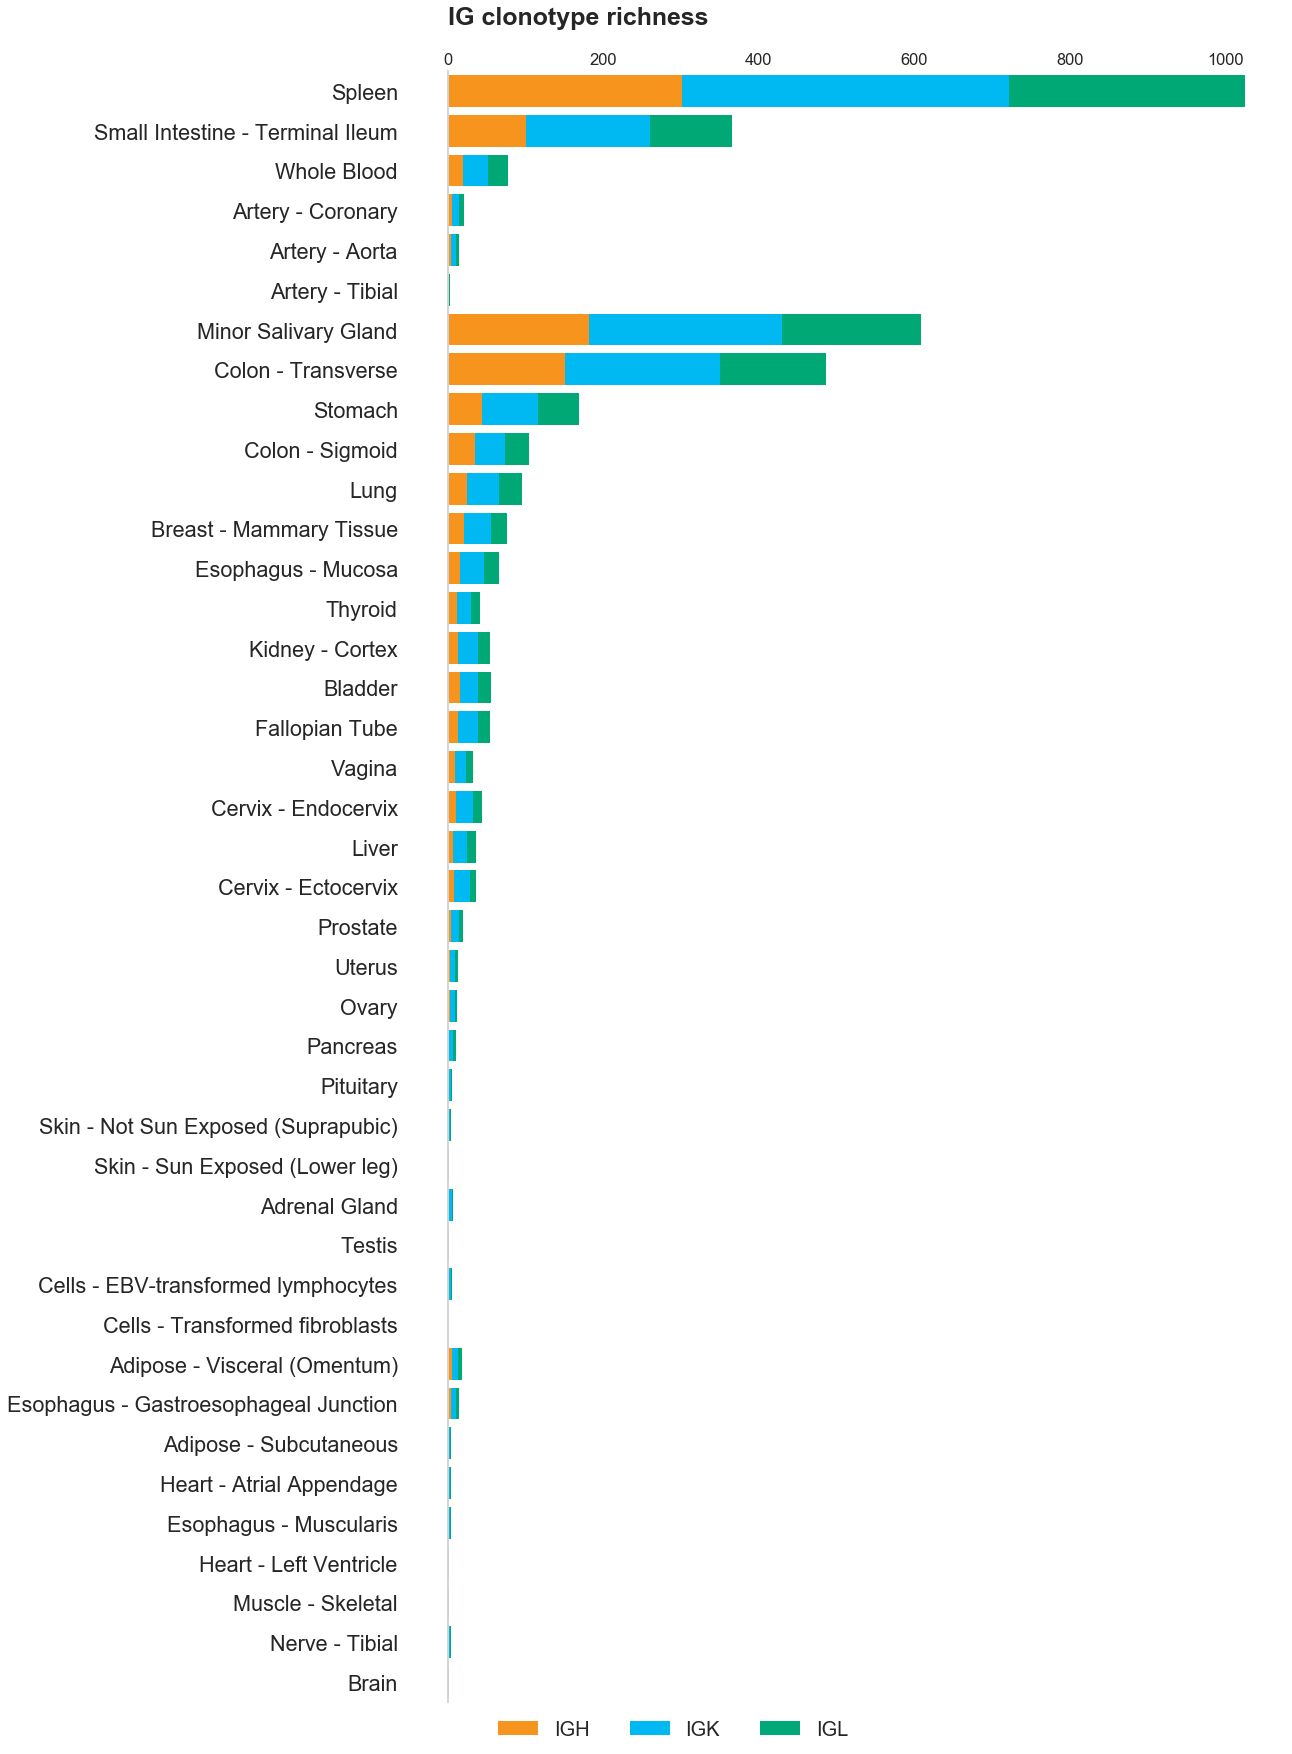

In [59]:
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(15,30))

ax = sns.barplot(x = 'IGL', y = 'Body site', data=clo_div_df, color = '#00a875', saturation=1, linewidth=0)
ax = sns.barplot(x = 'IGK', y = 'Body site', data=clo_div_df, color = '#00b9f2', saturation=1, linewidth=0)
ax = sns.barplot(x = 'IGH', y = 'Body site', data=clo_div_df, color = '#F7941D', saturation=1, linewidth=0)

ax.set(xlabel='', ylabel='')
plt.title('IG clonotype richness', y=1.025, fontweight='bold', fontsize=25, loc='left')
ax.xaxis.set_ticks_position("top")
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0, pad=50, labelsize='large')

leftbar = plt.Rectangle((0,0),1,1,fc="#F7941D", edgecolor = 'none')
centerbar = plt.Rectangle((0,0),1,1,fc='#00b9f2', edgecolor = 'none')
rightbar = plt.Rectangle((0,0),1,1,fc='#00a875', edgecolor = 'none')
l = plt.legend([leftbar, centerbar, rightbar], ['IGH', 'IGK', 'IGL'], bbox_to_anchor=(0.5,0), ncol = 3, 
               prop={'size':20})
l.draw_frame(False)
ax.spines['left'].set_color('lightgray')
plt.xticks(range(0, 1200, 200))

sns.despine(bottom=True)
plt.savefig("../figures/Figure3.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure3.png", bbox_inches='tight')